# Create image montage with single-cell crops

## Load in libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Define load image function

Referenced from [pyroptosis_signature_data_analysis repo](https://github.com/WayScience/pyroptosis_signature_data_analysis/blob/main/figures/3.figure3/notebooks/3.assemble_montage.ipynb).

In [2]:
load_image <- function(path){
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()
    return(p)
}

## Paths to images

In [3]:
# Directory with single-cell crops
sc_crop_dir <- "./sc_crops"

wt_dapi_path <- file.path(sc_crop_dir, "WT_genotype_DAPI_cropped.png")
wt_gfp_path <- file.path(sc_crop_dir, "WT_genotype_GFP_cropped.png")
wt_cy5_path <- file.path(sc_crop_dir, "WT_genotype_CY5_cropped.png")
wt_rfp_path <- file.path(sc_crop_dir, "WT_genotype_RFP_cropped.png")
wt_comp_path <- file.path(sc_crop_dir, "WT_genotype_composite_cropped.png")

null_dapi_path <- file.path(sc_crop_dir, "Null_genotype_DAPI_cropped.png")
null_gfp_path <- file.path(sc_crop_dir, "Null_genotype_GFP_cropped.png")
null_cy5_path <- file.path(sc_crop_dir, "Null_genotype_CY5_cropped.png")
null_rfp_path <- file.path(sc_crop_dir, "Null_genotype_RFP_cropped.png")
null_comp_path <- file.path(sc_crop_dir, "Null_genotype_composite_cropped.png")


## Load in images as ggplot objects and put them into a list

In [4]:
# load WT images 
wt_dapi_image <- load_image(wt_dapi_path)
wt_gfp_image <- load_image(wt_gfp_path)
wt_cy5_image <- load_image(wt_cy5_path)
wt_rfp_image <- load_image(wt_rfp_path)
wt_comp_image <- load_image(wt_comp_path)

# load Null images 
null_dapi_image <- load_image(null_dapi_path)
null_gfp_image <- load_image(null_gfp_path)
null_cy5_image <- load_image(null_cy5_path)
null_rfp_image <- load_image(null_rfp_path)
null_comp_image <- load_image(null_comp_path)

# Create list of images
list_of_images <- list(
    wt_dapi_image,
    wt_gfp_image,
    wt_cy5_image,
    wt_rfp_image,
    wt_comp_image,

    null_dapi_image,
    null_gfp_image,
    null_cy5_image,
    null_rfp_image,
    null_comp_image
)

In [5]:
width <- 2.5
height <- 2.5

text_size <- 10

options(repr.plot.width = width, repr.plot.height = height)

# ggplot of just text for each genotype
wt_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "WT (NF1 +/+)"), size = text_size, angle = 90) 
    + theme_void()
)
null_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Null (NF1 -/-)"), size = text_size, angle = 90) 
    + theme_void()
)

In [6]:
# patchwork the cropped single-cell images together
width <- 17
height <- 8

options(repr.plot.width = width, repr.plot.height = height)

# Stitch the images together for each genotype with spacer
wt_images <- (
    wt_text
    + list_of_images[[1]]
    + list_of_images[[2]]
    + list_of_images[[3]]
    + list_of_images[[4]]
    + list_of_images[[5]]
    + plot_layout(nrow = 1, widths = c(0.5, 1, 1, 1, 1, 1))
)

null_images <- (
    null_text
    + list_of_images[[6]]
    + list_of_images[[7]]
    + list_of_images[[8]]
    + list_of_images[[9]]
    + list_of_images[[10]]
    + plot_layout(nrow = 1, widths = c(0.5, 1, 1, 1, 1, 1))
)

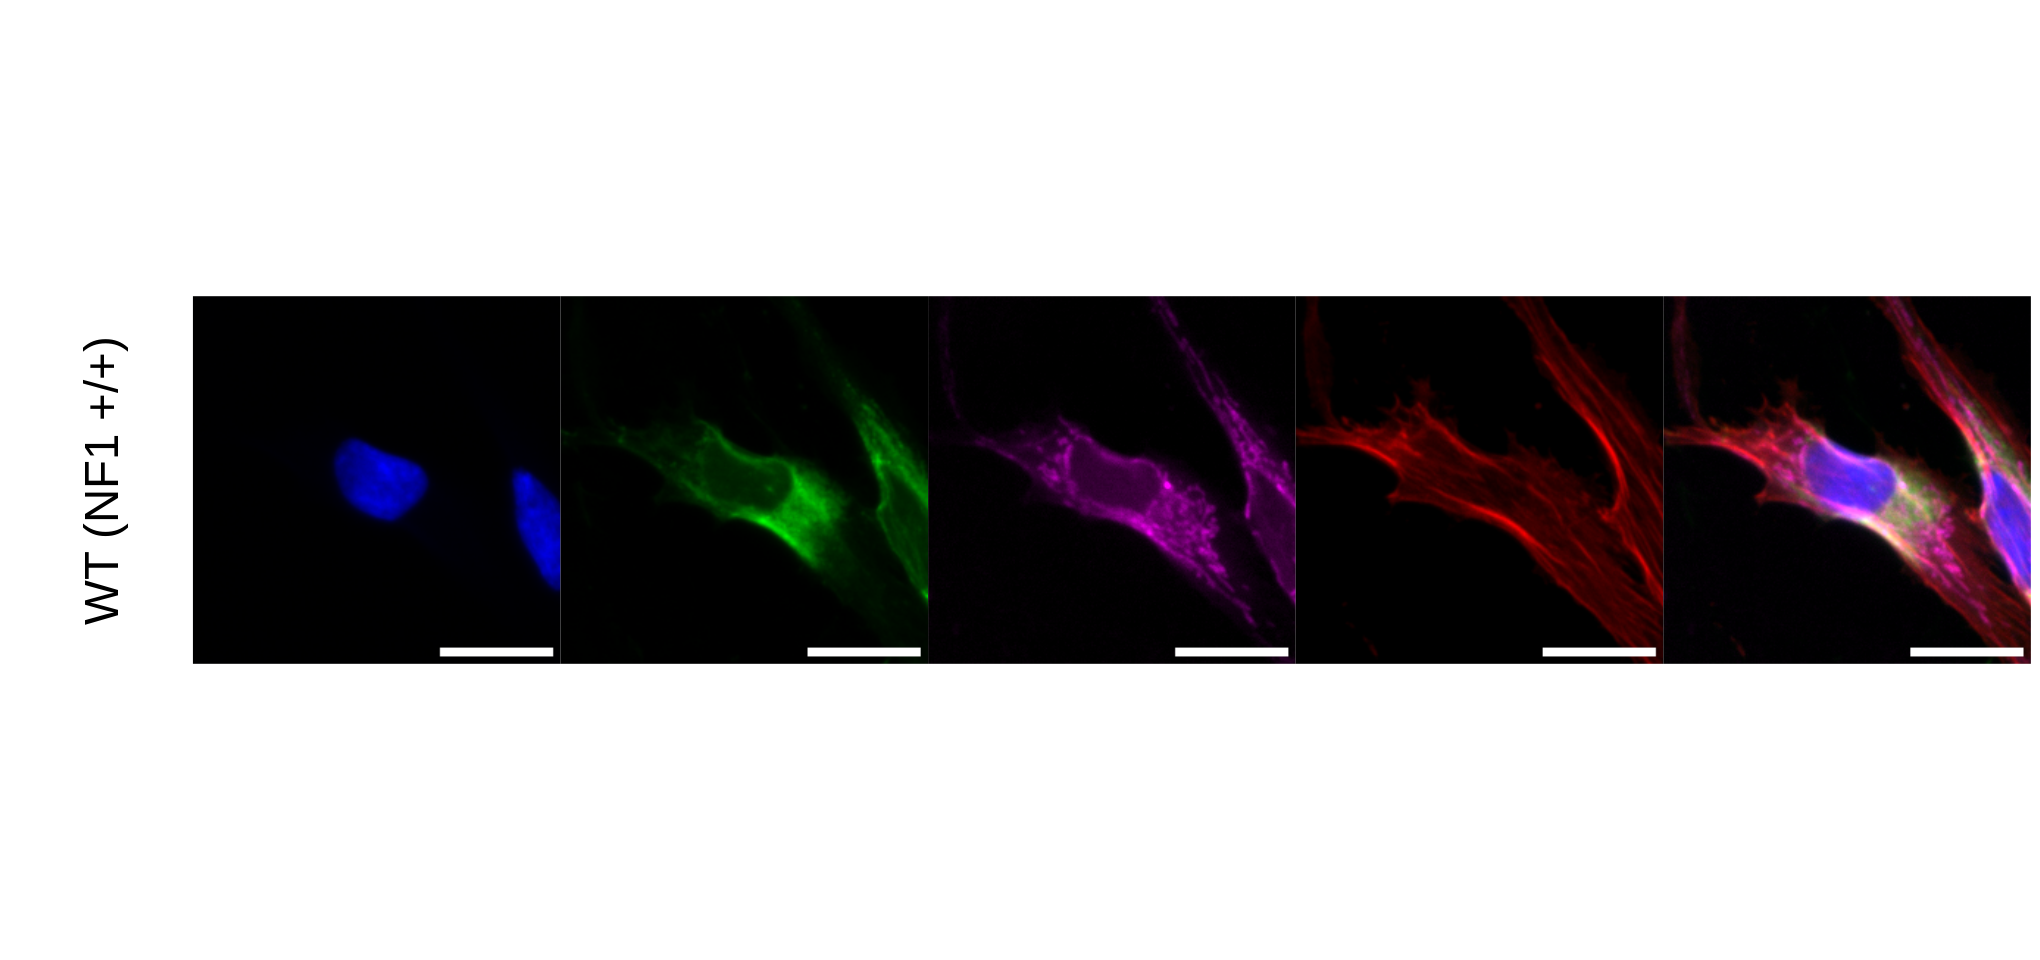

In [7]:
wt_images

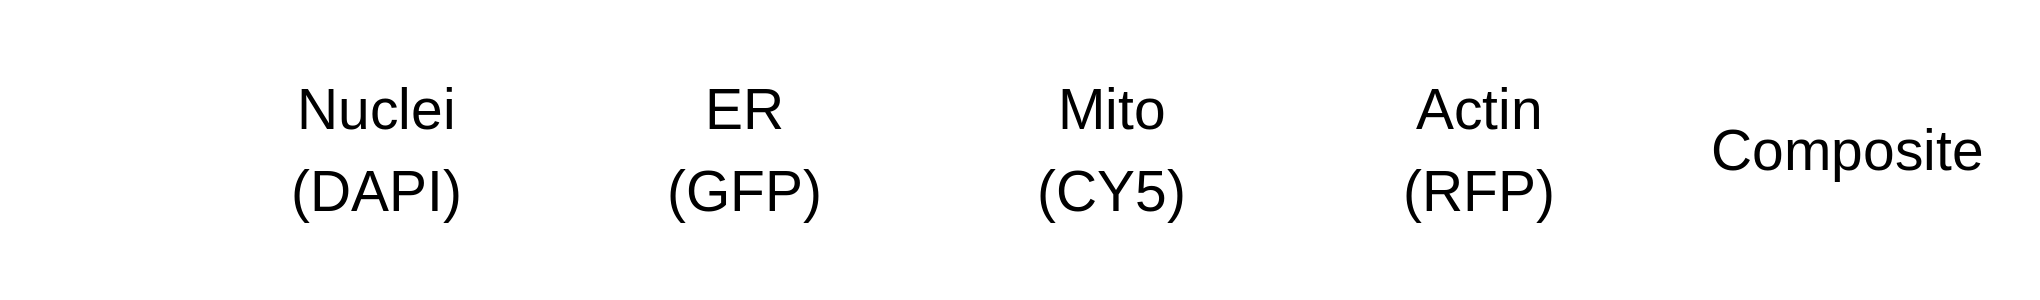

In [8]:
# Generate labels for each channel
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# blank
blank <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = ""), size = text_size) 
    + theme_void()
)

# ggplot of just text
dapi_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Nuclei\n(DAPI)"), size = text_size) 
    + theme_void()
)
gfp_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "ER\n(GFP)"), size = text_size) 
    + theme_void()
)
cy5_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Mito\n(CY5)"), size = text_size) 
    + theme_void()
)
rfp_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Actin\n(RFP)"), size = text_size) 
    + theme_void()
)
composite_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Composite"), size = text_size) 
    + theme_void()
)


# patch channel texts together
patch_text <- (
    blank
    + dapi_text
    + gfp_text
    + cy5_text
    + rfp_text
    + composite_text
    + plot_layout(nrow = 1, widths = c(0.5, 1, 1, 1, 1, 1))
)
width <- 17
height <- 2.5

options(repr.plot.width = width, repr.plot.height = height)


patch_text

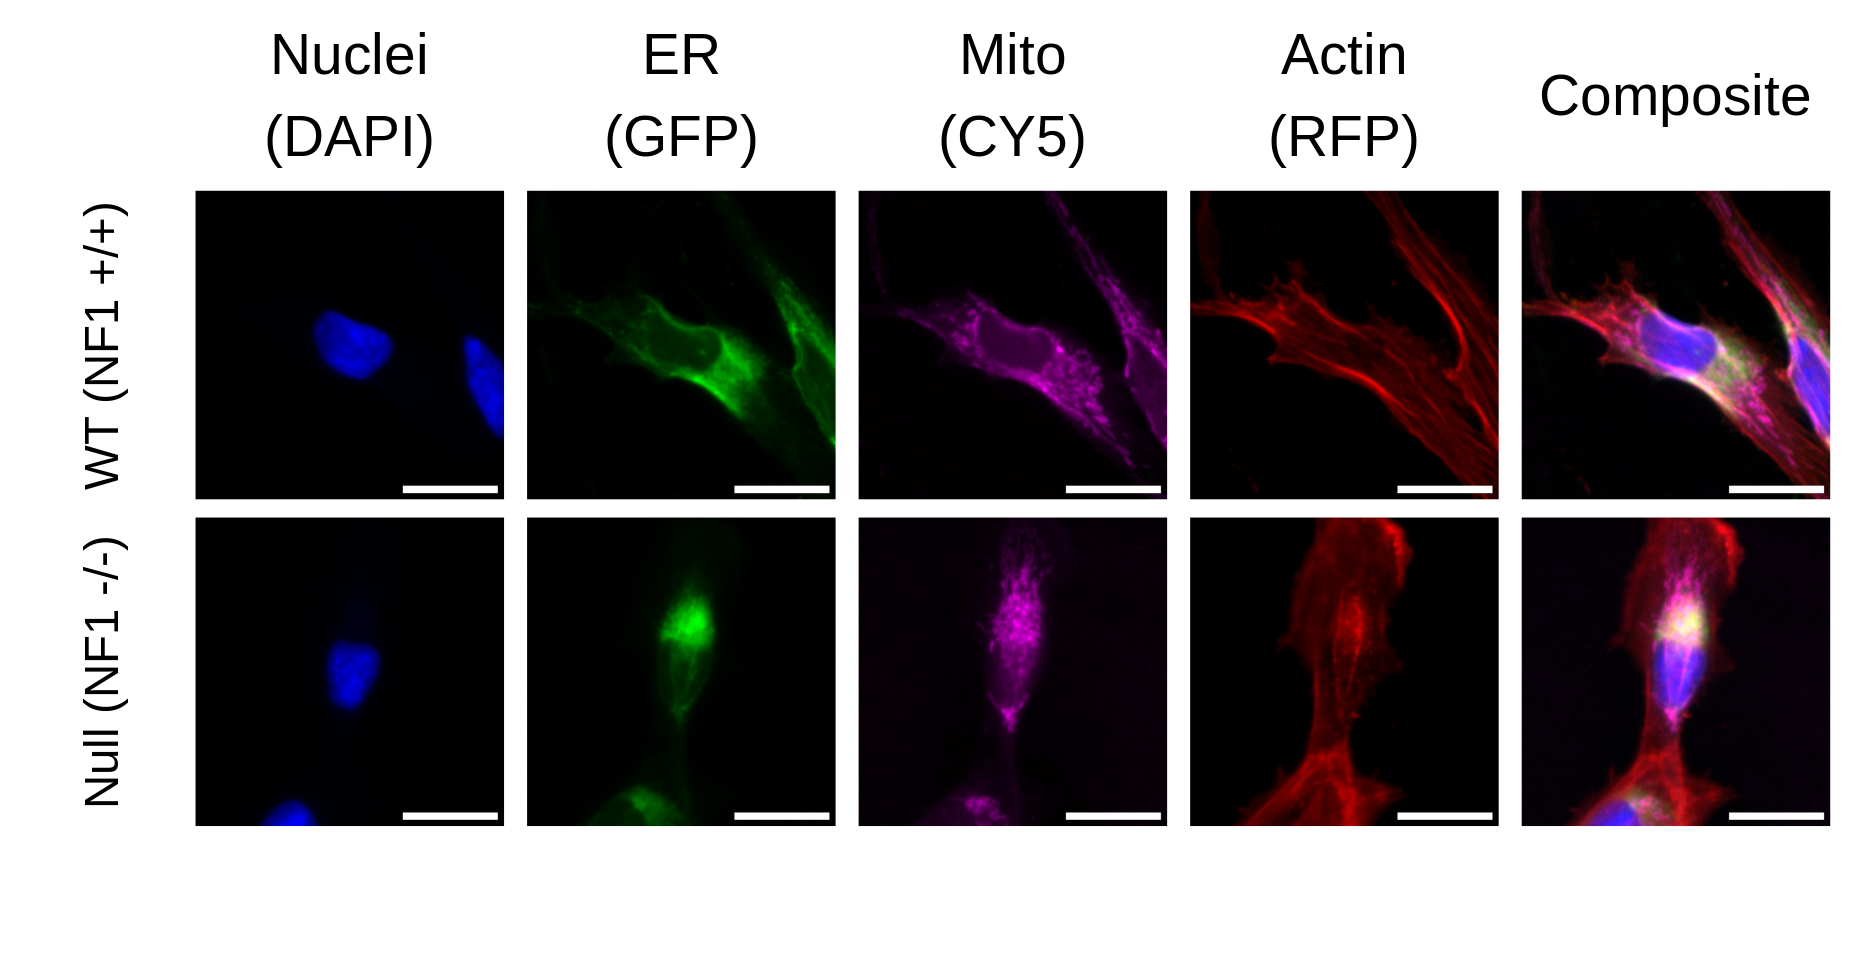

In [9]:
# Create montage
width <- 15.5
height <- 8

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
all_plot <- (
    wrap_elements(full = patch_text)
    + wrap_elements(full = wt_images)
    + wrap_elements(full = null_images)
    + plot_layout(ncol = 1, widths = c(1, 1, 1), heights = c(0.2, 0.4, 0.4, 0.15))
    )

all_plot

# save plot
ggsave(
    file.path(
        paste0(
            "../figures/","all_genotypes_montage.png"
        )
    ),
    all_plot, width = width, height = height, dpi = 600
)